In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

pd.get_option("display.max_columns")
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,5)})

# 1. Import data

In [2]:
df = pd.read_csv('df_eda_final')
df

,cur_brand2,pre_brand2,zone2,edu2,children,pro2,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3
0,MJN,MJN Solutions,Others,Elementary School,2,Ontario,Self Enrolled,Stage 3,0.68,0.04,0.75,1
1,Nestle,Parent's Choice Stage 1,Others,High School,2,Ontario,Self Enrolled,Stage 3,0.10,0.07,0.00,0
2,MJN,MJN Stage1,MJN,Elementary School,3,Alberta,Self Enrolled,Stage 3,0.00,0.00,0.00,1
3,MJN,Abbott Stage1,MJN,Elementary School,3,British Columbia,Self Enrolled,Stage 3,0.00,0.00,0.00,1
4,MJN,MJN Stage1,MJN,Elementary School,1,Nova Scotia,Self Enrolled,Stage 0,0.25,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,Others,Abbott Stage1,Others,Elementary School,0,Saskatchewan,CoReg,Stage 1,0.00,0.00,0.00,0
1903,Abbott,Abbott Solutions,Others,Elementary School,1,Quebec,Self Enrolled,Stage 2,0.00,0.00,0.00,0
1904,MJN,MJN Stage1,MJN,High School,1,British Columbia,Self Enrolled,Stage 1,0.67,0.00,0.25,1
1905,MJN,MJN Stage2,MJN,Elementary School,1,Ontario,Self Enrolled,Stage 2,0.00,0.00,0.00,1


In [3]:
df = df.drop(columns=['cur_brand2'])
df

,pre_brand2,zone2,edu2,children,pro2,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3
0,MJN Solutions,Others,Elementary School,2,Ontario,Self Enrolled,Stage 3,0.68,0.04,0.75,1
1,Parent's Choice Stage 1,Others,High School,2,Ontario,Self Enrolled,Stage 3,0.10,0.07,0.00,0
2,MJN Stage1,MJN,Elementary School,3,Alberta,Self Enrolled,Stage 3,0.00,0.00,0.00,1
3,Abbott Stage1,MJN,Elementary School,3,British Columbia,Self Enrolled,Stage 3,0.00,0.00,0.00,1
4,MJN Stage1,MJN,Elementary School,1,Nova Scotia,Self Enrolled,Stage 0,0.25,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
1902,Abbott Stage1,Others,Elementary School,0,Saskatchewan,CoReg,Stage 1,0.00,0.00,0.00,0
1903,Abbott Solutions,Others,Elementary School,1,Quebec,Self Enrolled,Stage 2,0.00,0.00,0.00,0
1904,MJN Stage1,MJN,High School,1,British Columbia,Self Enrolled,Stage 1,0.67,0.00,0.25,1
1905,MJN Stage2,MJN,Elementary School,1,Ontario,Self Enrolled,Stage 2,0.00,0.00,0.00,1


# 2. Feature Engineering

In [4]:
# create dummy variables for "province"
df1 = pd.get_dummies(df, prefix='pro2', columns=['pro2'])
df1.head()

,pre_brand2,zone2,edu2,children,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3,...,pro2_New Brunswick,pro2_Newfoundland & Labrador,pro2_Northwest Territories,pro2_Nova Scotia,pro2_Ontario,pro2_Others,pro2_Prince Edward Island,pro2_Quebec,pro2_Saskatchewan,pro2_Yukon
0,MJN Solutions,Others,Elementary School,2,Self Enrolled,Stage 3,0.68,0.04,0.75,1,...,0,0,0,0,1,0,0,0,0,0
1,Parent's Choice Stage 1,Others,High School,2,Self Enrolled,Stage 3,0.10,0.07,0.00,0,...,0,0,0,0,1,0,0,0,0,0
2,MJN Stage1,MJN,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,Abbott Stage1,MJN,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
4,MJN Stage1,MJN,Elementary School,1,Self Enrolled,Stage 0,0.25,0.00,0.00,1,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# create dummy variables for "previous brand"
df1 = pd.get_dummies(df1, prefix='pre_brand', columns=['pre_brand2'])
df1.head()

,zone2,edu2,children,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,...,pre_brand_MJN Specialty,pre_brand_MJN Stage1,pre_brand_MJN Stage2,pre_brand_Nestle Solutions,pre_brand_Nestle Stage 1,pre_brand_Nestle Stage 2,pre_brand_Others,pre_brand_Parent's Choice Stage 1,pre_brand_Parent's Choice Stage 2,pre_brand_President's Choice Stage 2
0,Others,Elementary School,2,Self Enrolled,Stage 3,0.68,0.04,0.75,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Others,High School,2,Self Enrolled,Stage 3,0.10,0.07,0.00,0,0,...,0,0,0,0,0,0,0,1,0,0
2,MJN,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,1,...,0,1,0,0,0,0,0,0,0,0
3,MJN,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,MJN,Elementary School,1,Self Enrolled,Stage 0,0.25,0.00,0.00,1,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# manipulate the "hospital zone" column
df1['zone2'] = df1['zone2'].apply(lambda x: 1 if x == "MJN" else 0)
df1.head()

,zone2,edu2,children,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,...,pre_brand_MJN Specialty,pre_brand_MJN Stage1,pre_brand_MJN Stage2,pre_brand_Nestle Solutions,pre_brand_Nestle Stage 1,pre_brand_Nestle Stage 2,pre_brand_Others,pre_brand_Parent's Choice Stage 1,pre_brand_Parent's Choice Stage 2,pre_brand_President's Choice Stage 2
0,0,Elementary School,2,Self Enrolled,Stage 3,0.68,0.04,0.75,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,High School,2,Self Enrolled,Stage 3,0.10,0.07,0.00,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,1,...,0,1,0,0,0,0,0,0,0,0
3,1,Elementary School,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Elementary School,1,Self Enrolled,Stage 0,0.25,0.00,0.00,1,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
# create dummy variables for "education"
df1 = pd.get_dummies(df1, prefix='edu', columns=['edu2'])
df1.head()

,zone2,children,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,pro2_British Columbia,...,pre_brand_Nestle Solutions,pre_brand_Nestle Stage 1,pre_brand_Nestle Stage 2,pre_brand_Others,pre_brand_Parent's Choice Stage 1,pre_brand_Parent's Choice Stage 2,pre_brand_President's Choice Stage 2,edu_Elementary School,edu_High School,edu_Others
0,0,2,Self Enrolled,Stage 3,0.68,0.04,0.75,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,Self Enrolled,Stage 3,0.10,0.07,0.00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,Self Enrolled,Stage 3,0.00,0.00,0.00,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,Self Enrolled,Stage 0,0.25,0.00,0.00,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# create dummy variables for "enrollment type"
df1 = pd.get_dummies(df1, prefix='enroll_type', columns=['enroll_type2'])
df1.head()

,zone2,children,age_period,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,pro2_British Columbia,pro2_Manitoba,...,pre_brand_Parent's Choice Stage 1,pre_brand_Parent's Choice Stage 2,pre_brand_President's Choice Stage 2,edu_Elementary School,edu_High School,edu_Others,enroll_type_CoReg,enroll_type_Others,enroll_type_Purchased,enroll_type_Self Enrolled
0,0,2,Stage 3,0.68,0.04,0.75,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,2,Stage 3,0.10,0.07,0.00,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,3,Stage 3,0.00,0.00,0.00,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,3,Stage 3,0.00,0.00,0.00,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,Stage 0,0.25,0.00,0.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
# create dummy variables for "age period when they enroll"
df1 = pd.get_dummies(df1, prefix='age', columns=['age_period'])
df1.head()

,zone2,children,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,pro2_British Columbia,pro2_Manitoba,pro2_New Brunswick,...,edu_High School,edu_Others,enroll_type_CoReg,enroll_type_Others,enroll_type_Purchased,enroll_type_Self Enrolled,age_Stage 0,age_Stage 1,age_Stage 2,age_Stage 3
0,0,2,0.68,0.04,0.75,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,2,0.10,0.07,0.00,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,0.00,0.00,0.00,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,3,0.00,0.00,0.00,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0.25,0.00,0.00,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [10]:
# scale the "children" column
scaler = MinMaxScaler()
df1[['children']] = scaler.fit_transform(df1[['children']])
df1.head()

,zone2,children,or01,ctr01,redem_rate1,cur_brand3,pro2_Alberta,pro2_British Columbia,pro2_Manitoba,pro2_New Brunswick,...,edu_High School,edu_Others,enroll_type_CoReg,enroll_type_Others,enroll_type_Purchased,enroll_type_Self Enrolled,age_Stage 0,age_Stage 1,age_Stage 2,age_Stage 3
0,0,0.666667,0.68,0.04,0.75,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0.666667,0.10,0.07,0.00,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,1.000000,0.00,0.00,0.00,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1.000000,0.00,0.00,0.00,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0.333333,0.25,0.00,0.00,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [11]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906
zone2,0.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0
children,0.666667,0.666667,1.0,1.0,0.333333,0.333333,0.666667,0.666667,0.666667,1.0,...,0.333333,1.0,0.333333,0.333333,0.666667,0.0,0.333333,0.333333,0.333333,1.0
or01,0.680000,0.100000,0.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.560000,0.000000,0.0,0.000000,0.670000,0.000000,0.6
ctr01,0.040000,0.070000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
redem_rate1,0.750000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.250000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.250000,0.000000,0.0
cur_brand3,1.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0
pro2_Alberta,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
pro2_British Columbia,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0
pro2_Manitoba,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
pro2_New Brunswick,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


# 3. Modelling (Feature Combination 1)

## 3.1 Train-test-split and Oversample

In [12]:
# train test split
df_x = df1.drop(columns= ['cur_brand3'])
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                   df1['cur_brand3'],
                                                    test_size = 0.2,
                                                    stratify=df1['cur_brand3'], 
                                                    random_state=0)

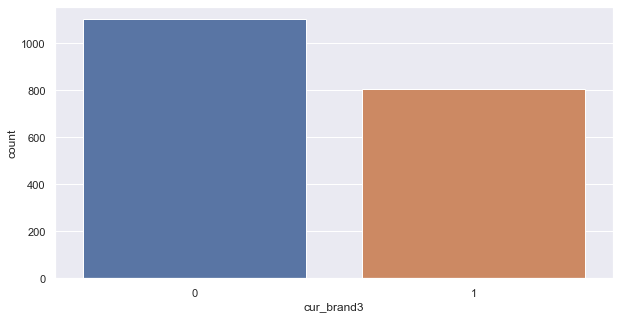

In [13]:
# dependent variable: current brand
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x="cur_brand3", data=df1)

In [14]:
# Oversample the training set
training_set = pd.concat([X_train, y_train], axis=1)

# Separating classes
our_brand = training_set[training_set.cur_brand3 == 1]
not_our_brand = training_set[training_set.cur_brand3 == 0]

In [15]:
# Oversampling the minority
oversample = resample(our_brand, 
                       replace=True, 
                       n_samples=len(not_our_brand), #set the number of samples to equal the number of the majority class
                       random_state=0)

# Returning to new training set
oversample_train = pd.concat([not_our_brand, oversample])
oversample_train.cur_brand3.value_counts(normalize=True)

0    0.5
1    0.5
Name: cur_brand3, dtype: float64

In [16]:
# Separate oversampled data into X and y sets
oversample_X_train = oversample_train.drop('cur_brand3', axis=1)
oversample_y_train = oversample_train.cur_brand3

## 3.2 ML Models

### 3.2.1 Logistic Regression 

In [17]:
clf_lr = LogisticRegression()

# cross validation
scores = cross_val_score(clf_lr, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_lr, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.91501416 0.9121813  0.90625    0.92613636 0.91193182]
0.6572077185017027
0.9143 accuracy with a standard deviation of 0.01


In [18]:
# predict and print
clf_lr.fit(oversample_X_train, oversample_y_train)
y_pred_lr = clf_lr.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       221
           1       0.84      0.87      0.86       161

    accuracy                           0.88       382
   macro avg       0.87      0.88      0.87       382
weighted avg       0.88      0.88      0.88       382



In [19]:
# Gridsearch CV to tune hyperparameters
clr_lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,500,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

clf_lr = GridSearchCV(clr_lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_lr.fit(oversample_X_train, oversample_y_train)
clf_lr.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/ben/Desktop/py_proj/stage1_2_retention/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ben/Desktop/py_proj/stage1_2_retention/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [20]:
# apply the best set of parameters
clf_lr = LogisticRegression(penalty=clf_lr.best_params_['penalty'], C=clf_lr.best_params_['C'],
                           max_iter =clf_lr.best_params_['max_iter'], solver =clf_lr.best_params_['solver'])
    
# fit and predict
clf_lr.fit(oversample_X_train, oversample_y_train)
y_pred_lr = clf_lr.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))

accuracy:  0.8769633507853403


[[195  26]
 [ 21 140]]


<AxesSubplot:>

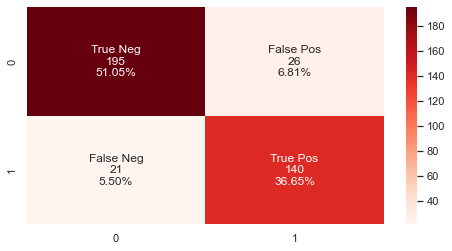

In [21]:
# plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [22]:
# show the coefficient ranking
df_coe = pd.DataFrame(list(zip(df_x.columns.tolist(),clf_lr.coef_.squeeze().tolist())), columns = ['var', 'coe'])
df_coe['rank'] = df_coe['coe'].rank(ascending=False)
df_coe_rk = df_coe.sort_values(by='coe', ascending=False)
df_coe_rk

,var,coe,rank
26,pre_brand_MJN Stage1,3.530819,1.0
24,pre_brand_MJN Solutions,3.243327,2.0
25,pre_brand_MJN Specialty,1.411019,3.0
19,pre_brand_Abbott Specialty,0.970770,4.0
27,pre_brand_MJN Stage2,0.780884,5.0
2,or01,0.642431,6.0
13,pro2_Others,0.629082,7.0
41,enroll_type_Self Enrolled,0.602019,8.0
3,ctr01,0.520117,9.0
4,redem_rate1,0.482260,10.0


Text(0.5, 0, 'Variables')

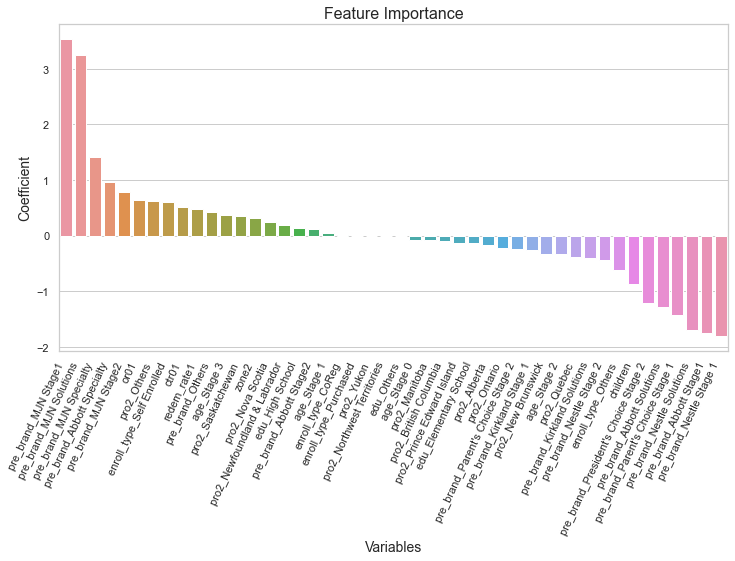

In [23]:
# plot the feature importance
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="var", y="coe", data=df_coe_rk)
plt.xticks(rotation=65, horizontalalignment='right')
ax.set_title("Feature Importance", size =16)
ax.set_ylabel("Coefficient",size=14)
ax.set_xlabel("Variables", size=14)

### 3.2.2 Random Forest

In [24]:
clf_rf = RandomForestClassifier()

# cross validation
scores = cross_val_score(clf_rf, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_rf, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.92634561 0.9121813  0.90056818 0.94318182 0.92897727]
0.695800227014756
0.9223 accuracy with a standard deviation of 0.01


In [25]:
# fit and predict 
clf_rf.fit(oversample_X_train, oversample_y_train)
y_pred_rf = clf_rf.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       221
           1       0.85      0.82      0.84       161

    accuracy                           0.86       382
   macro avg       0.86      0.86      0.86       382
weighted avg       0.86      0.86      0.86       382



In [26]:
clr_rf = RandomForestClassifier()

param_grid =  {'n_estimators': range(100,600,100),
               'criterion': ['entropy', 'gini'], 'max_depth': range(4,13)}

clf_rf = GridSearchCV(clr_rf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_rf.fit(oversample_X_train, oversample_y_train)
clf_rf.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 300}

In [27]:
# apply the best set of parameters
clf_rf = RandomForestClassifier(n_estimators = clf_rf.best_params_['n_estimators'], 
                                criterion = clf_rf.best_params_['criterion'],
                                max_depth = clf_rf.best_params_['max_depth'])
    
# fit and predict
clf_rf.fit(oversample_X_train, oversample_y_train)
y_pred_rf = clf_rf.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

accuracy:  0.887434554973822


[[201  20]
 [ 23 138]]


<AxesSubplot:>

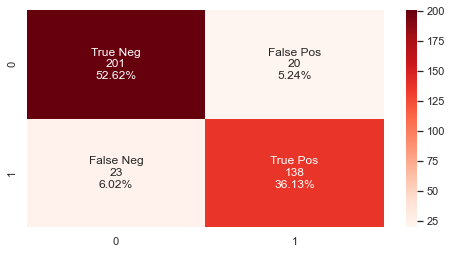

In [28]:
# get the confusion matrix and plot
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [29]:
# prepare for the plot
# feature_names = [i for i in range(df_x.shape[1])]
feature_names = df_x.columns
clf_rf.fit(oversample_X_train, oversample_y_train)
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

Text(0.5, -135.1514530717325, 'Variables')

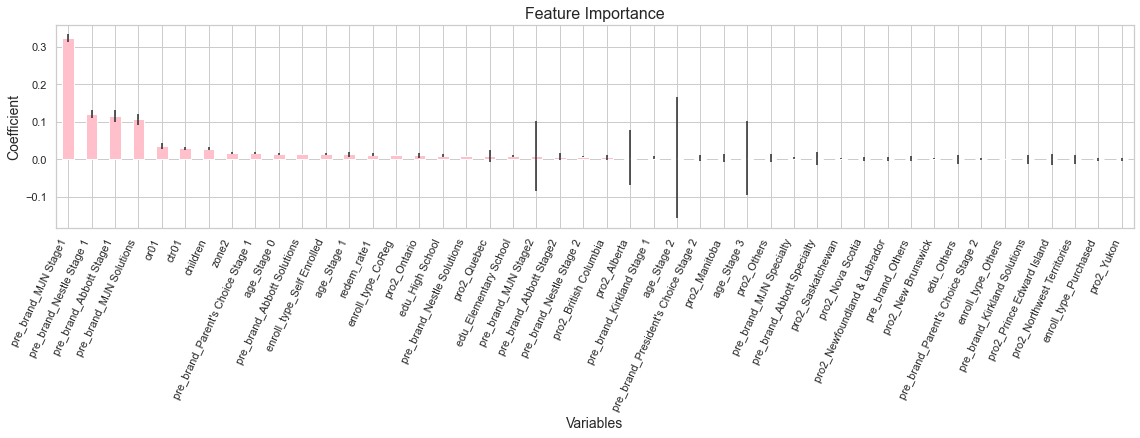

In [30]:
# plot the feature importance
sns.set(rc={'figure.figsize':(16,6)})
sns.set_theme(style="whitegrid")
sns.color_palette("hls", 8)
forest_importances = pd.Series(importances, index=feature_names).sort_values( ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax,color='pink')
ax.set_title("Feature Importance", size =16)
ax.set_ylabel("Mean decrease in impurity")

plt.xticks(rotation=65, horizontalalignment='right')
fig.tight_layout()
ax.set_ylabel("Coefficient",size=14)
ax.set_xlabel("Variables", size=14)

In [31]:
# rank the coefficient
df_coe = pd.DataFrame(list(zip(df_x.columns.tolist(),clf_rf.feature_importances_.squeeze().tolist())), columns = ['var', 'coe'])
df_coe['rk'] = df_coe['coe'].rank(ascending=False)
df_coe.sort_values(by='coe', ascending=False)

,var,coe,rk
26,pre_brand_MJN Stage1,0.323663,1.0
29,pre_brand_Nestle Stage 1,0.121264,2.0
20,pre_brand_Abbott Stage1,0.115313,3.0
24,pre_brand_MJN Solutions,0.106849,4.0
2,or01,0.036179,5.0
3,ctr01,0.029573,6.0
1,children,0.029015,7.0
0,zone2,0.016970,8.0
32,pre_brand_Parent's Choice Stage 1,0.016800,9.0
42,age_Stage 0,0.015399,10.0


# 4 Modelling (Feature Combination 2)

## 4.1 Train-test-split and Oversample

In [32]:
df2 = df1[df1.columns.drop(list(df1.filter(regex='pro2')))]

In [33]:
df2.shape

(1907, 34)

In [34]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906
zone2,0.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0
children,0.666667,0.666667,1.0,1.0,0.333333,0.333333,0.666667,0.666667,0.666667,1.0,...,0.333333,1.0,0.333333,0.333333,0.666667,0.0,0.333333,0.333333,0.333333,1.0
or01,0.680000,0.100000,0.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.560000,0.000000,0.0,0.000000,0.670000,0.000000,0.6
ctr01,0.040000,0.070000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
redem_rate1,0.750000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.250000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.250000,0.000000,0.0
cur_brand3,1.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0
pre_brand_Abbott Solutions,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
pre_brand_Abbott Specialty,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
pre_brand_Abbott Stage1,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,...,0.000000,1.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0
pre_brand_Abbott Stage2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [35]:
# train test split
df_x2 = df2.drop(columns= ['cur_brand3'])
X_train, X_test, y_train, y_test = train_test_split(df_x2, 
                                                   df2['cur_brand3'],
                                                    test_size = 0.2,
                                                    stratify=df2['cur_brand3'], 
                                                    random_state=0)

In [36]:
# Returning to one dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# Separating classes
our_brand = training_set[training_set.cur_brand3 == 1]
not_our_brand = training_set[training_set.cur_brand3 == 0]

In [37]:
# Oversampling the minority
oversample = resample(our_brand, 
                       replace=True, 
                       n_samples=len(not_our_brand), #set the number of samples to equal the number of the majority class
                       random_state=0)

# Returning to new training set
oversample_train = pd.concat([not_our_brand, oversample])
oversample_train.cur_brand3.value_counts(normalize=True)

0    0.5
1    0.5
Name: cur_brand3, dtype: float64

In [38]:
# Separate oversampled data into X and y sets
oversample_X_train = oversample_train.drop('cur_brand3', axis=1)
oversample_y_train = oversample_train.cur_brand3

## 4.2 ML Models

### 4.2.1 Logistic Regression

In [39]:
clf_lr = LogisticRegression()

# cross validation
scores = cross_val_score(clf_lr, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_lr, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.91784703 0.91501416 0.90056818 0.92613636 0.90909091]
0.6549375709421112
0.9137 accuracy with a standard deviation of 0.01


In [40]:
# fit and predict
clf_lr.fit(oversample_X_train, oversample_y_train)
y_pred_lr = clf_lr.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       221
           1       0.84      0.87      0.85       161

    accuracy                           0.87       382
   macro avg       0.87      0.87      0.87       382
weighted avg       0.88      0.87      0.87       382



In [41]:
# Gridsearch CV to tune hyperparameters
clr_lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,500,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

clf_lr = GridSearchCV(clr_lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_lr.fit(oversample_X_train, oversample_y_train)
clf_lr.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/ben/Desktop/py_proj/stage1_2_retention/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ben/Desktop/py_proj/stage1_2_retention/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [42]:
# apply the best set of parameters
clf_lr = LogisticRegression(penalty=clf_lr.best_params_['penalty'], C=clf_lr.best_params_['C'],
                           max_iter =clf_lr.best_params_['max_iter'], solver =clf_lr.best_params_['solver'])
    
# fit and predict
clf_lr.fit(oversample_X_train, oversample_y_train)
y_pred_lr = clf_lr.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))

accuracy:  0.8769633507853403


[[193  28]
 [ 19 142]]


<AxesSubplot:>

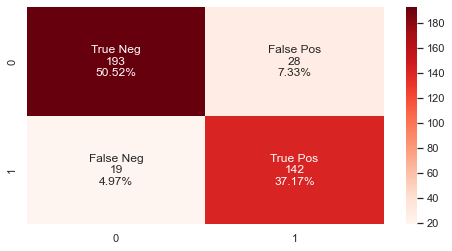

In [43]:
# plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

Text(0.5, 0, 'Variables')

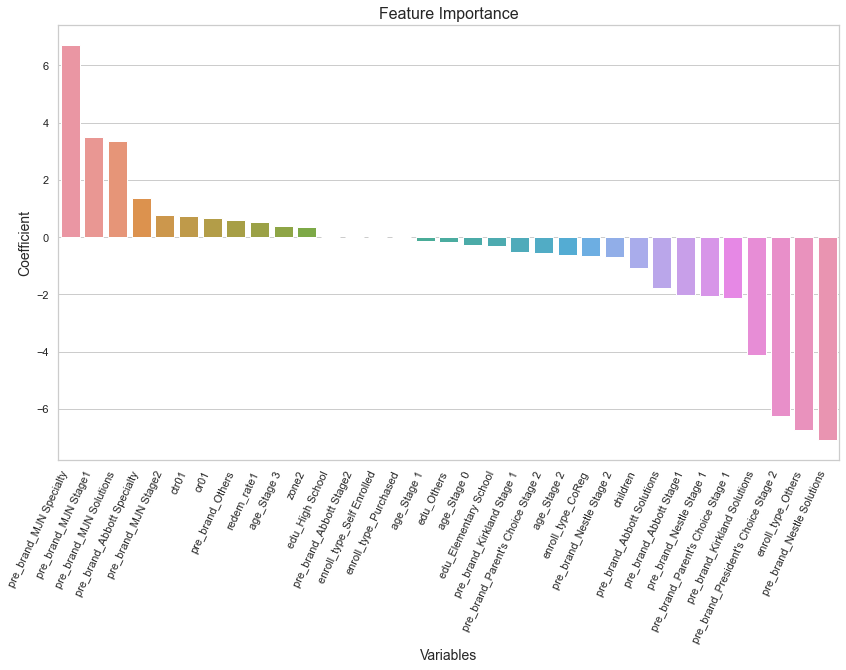

In [44]:
# plot the feature importance
sns.set(rc={'figure.figsize':(14,8)})
df_coe = pd.DataFrame(list(zip(df_x2.columns.tolist(),clf_lr.coef_.squeeze().tolist())), columns = ['var', 'coe'])
df_coe['rank'] = df_coe['coe'].rank(ascending=False)
df_coe_rk = df_coe.sort_values(by='coe', ascending=False)
df_coe_rk

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="var", y="coe", data=df_coe_rk)
plt.xticks(rotation=65, horizontalalignment='right')
ax.set_title("Feature Importance", size =16)
ax.set_ylabel("Coefficient",size=14)
ax.set_xlabel("Variables", size=14)

### 4.2.2 Random Forest

In [45]:
clf_rf = RandomForestClassifier()

# cross validation
scores = cross_val_score(clf_rf, oversample_X_train, oversample_y_train, scoring='accuracy', cv=5)
print(scores)

# make cross validated predictions
y_pred = cross_val_predict(clf_rf, oversample_X_train, oversample_y_train, cv=5)
print(r2_score(oversample_y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.91784703 0.91501416 0.90340909 0.9375     0.92329545]
0.6889897843359818
0.9194 accuracy with a standard deviation of 0.01


In [46]:
# fit and predict
clf_rf.fit(oversample_X_train, oversample_y_train)
y_pred_rf = clf_rf.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       221
           1       0.84      0.85      0.85       161

    accuracy                           0.87       382
   macro avg       0.87      0.87      0.87       382
weighted avg       0.87      0.87      0.87       382



In [47]:
# GridSearch to tune hyperparameters
clr_rf = RandomForestClassifier()

param_grid =  {'n_estimators': range(100,600,100),
               'criterion': ['entropy', 'gini'], 'max_depth': range(4,13)}

clf_rf = GridSearchCV(clr_rf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
clf_rf.fit(oversample_X_train, oversample_y_train)
clf_rf.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 500}

In [48]:
# apply the best set of parameters
clf_rf = RandomForestClassifier(n_estimators = clf_rf.best_params_['n_estimators'], 
                                criterion = clf_rf.best_params_['criterion'],
                                max_depth = clf_rf.best_params_['max_depth'])
    
# fit and predict
clf_rf.fit(oversample_X_train, oversample_y_train)
y_pred_rf = clf_rf.predict(X_test)

# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

accuracy:  0.887434554973822


[[201  20]
 [ 23 138]]


<AxesSubplot:>

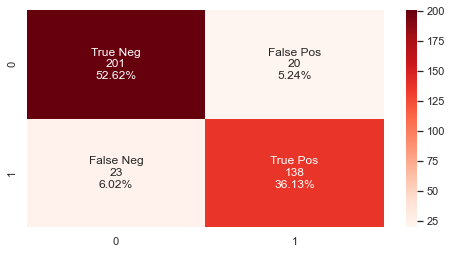

In [49]:
# plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [50]:
# prepare for the plot
# feature_names = [i for i in range(df_x.shape[1])]
feature_names = df_x2.columns
clf_rf.fit(oversample_X_train, oversample_y_train)
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

Text(0.5, -117.1514530717325, 'Variables')

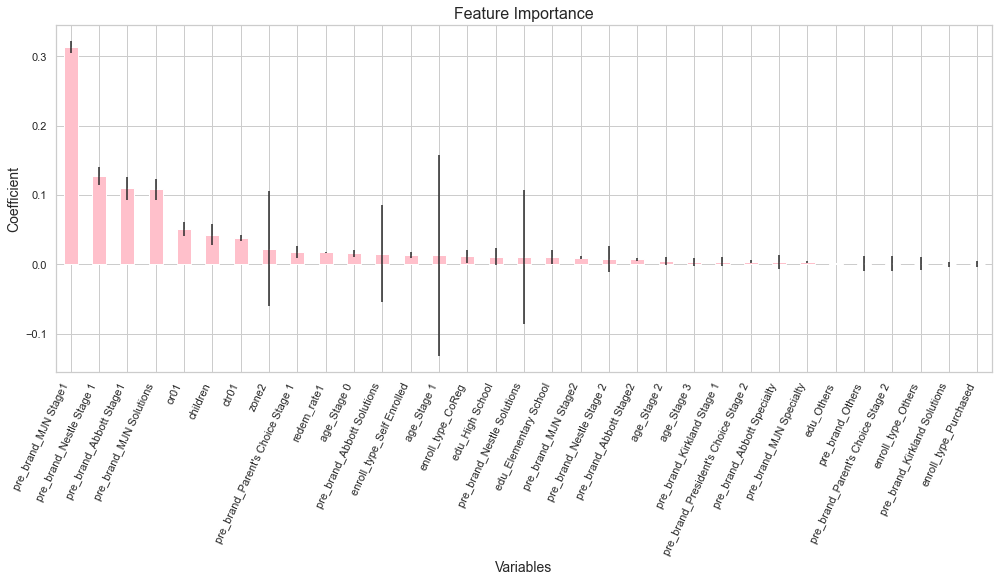

In [51]:
# plot the feature importance
sns.set(rc={'figure.figsize':(14,8)})
sns.set_theme(style="whitegrid")
sns.color_palette("hls", 8)
forest_importances = pd.Series(importances, index=feature_names).sort_values( ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax,color='pink')
ax.set_title("Feature Importance", size =16)
ax.set_ylabel("Mean decrease in impurity")

plt.xticks(rotation=65, horizontalalignment='right')
fig.tight_layout()
ax.set_ylabel("Coefficient",size=14)
ax.set_xlabel("Variables", size=14)